<a href="https://colab.research.google.com/github/MGoharshadi/Hospital_Package/blob/main/MLPnewCleanMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

mostafagoharshadi_life_expectancy_data_path = kagglehub.dataset_download('mostafagoharshadi/life-expectancy-data')

print('Data source import complete.')


In [ ]:
# MLP + new Cleaning Method using Regression


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from tensorflow.keras import layers, optimizers
from sklearn.neural_network import MLPRegressor



In [ ]:
life_data=pd.read_csv('/kaggle/input/life-expectancy-data/Life Expectancy Data.csv')
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
life_data1=life_data.drop('Country', axis=1)
life_data1=pd.get_dummies(life_data1,dtype=int)
life_data1

In [ ]:
# Convert column names to lowercase, replace spaces with underscores, and standardize
life_data1.columns = (
    life_data1.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace('/', '_')  # Replace slashes with underscores
)

# Verify the updated column names
print(life_data1.columns)

Index(['year', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv_aids', 'gdp', 'population', 'thinness__1-19_years',
       'thinness_5-9_years', 'income_composition_of_resources', 'schooling',
       'status_developed', 'status_developing'],
      dtype='object')


In [ ]:
life_data_cleaned1 = life_data1.dropna(subset=['life_expectancy','adult_mortality','bmi','polio','diphtheria','thinness__1-19_years','thinness_5-9_years'])
life_data_cleaned1

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,...,diphtheria,hiv_aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,status_developed,status_developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,...,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,0,1
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,...,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,0,1
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,...,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,0,1
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,...,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,0,1


In [ ]:
# Step 3: Define columns with null values to fill
columns_to_fill = [
    'adult_mortality', 'alcohol', 'hepatitis_b', 'bmi', 'polio', 'total_expenditure',
    'diphtheria', 'gdp', 'population', 'thinness_1-19_years', 'thinness_5-9_years',
    'income_composition_of_resources', 'schooling'
]

# Step 4: Fill null values using linear interpolation (method: Interpolation based on Regression)
for column in columns_to_fill:
    # Only apply interpolation if the column exists
    if column in life_data_cleaned1.columns:
        # Create a temporary DataFrame to avoid modifying the original data directly
        temp_data = life_data_cleaned1[['life_expectancy', column]].dropna()

        # Check if there is sufficient data for interpolation
        if temp_data.shape[0] > 1:
            # Perform linear interpolation on the column based on 'life_expectancy'
            interpolated_values = pd.Series(
                np.interp(
                    life_data_cleaned1['life_expectancy'],  # x-values for interpolation
                    temp_data['life_expectancy'],  # x-values of known points
                    temp_data[column]  # y-values of known points
                ),
                index=life_data_cleaned1.index
            )

            # Replace NaN values in the original column with interpolated values using .loc
            life_data_cleaned1.loc[life_data_cleaned1[column].isna(), column] = interpolated_values

In [ ]:
y = life_data_cleaned1['life_expectancy']
x = life_data_cleaned1.drop('life_expectancy', axis=1)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
print(x_train.shape,x_test.shape)

(2166, 21) (722, 21)


In [ ]:
x_train1,x_validation,y_train1,y_validation=train_test_split(x_train,y_train)
print(x_train1.shape,x_validation.shape)

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,...,diphtheria,hiv_aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling,status_developed,status_developing
2736,2009,231.0,5,8.71,324.549135,66.0,0,58.0,6,74.0,...,71.0,0.3,2545.483410,46533.0,2.5,2.6,0.734,14.9,0,1
479,2000,274.0,27,1.51,0.328418,79.0,12237,12.1,36,62.0,...,59.0,2.1,3.685949,12152354.0,11.6,11.9,0.401,7.2,0,1
2687,2009,118.0,23,1.40,106.948290,94.0,4,61.1,27,96.0,...,96.0,0.1,936.499911,71339185.0,4.9,4.8,0.709,12.5,0,1
152,2007,14.0,6,1.02,176.010711,62.0,0,45.9,7,81.0,...,79.0,0.1,3851.437869,85813.0,2.8,2.9,0.708,11.6,0,1
691,2013,9.0,0,12.45,0.000000,99.0,15,65.1,0,99.0,...,98.0,0.1,547.358878,12222251.0,1.8,1.9,0.434,9.8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,2015,19.0,0,1.68,0.000000,96.0,0,3.9,0,96.0,...,96.0,0.2,1624.639630,195553.0,5.5,5.3,0.565,11.2,0,1
2920,2001,611.0,43,2.61,46.830275,65.0,16997,17.1,70,86.0,...,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8,0,1
1160,2009,162.0,0,11.46,1281.155944,79.0,1,61.1,1,99.0,...,99.0,0.1,12967.165430,12265.0,1.8,1.8,0.816,15.3,1,0
662,2010,98.0,1,4.13,787.280816,96.0,0,57.7,1,99.0,...,96.0,0.1,5676.141430,12222251.0,3.4,3.2,0.784,17.6,0,1


In [ ]:
scaler = StandardScaler()
x_train_s= scaler.fit_transform(x_train1)
x_validation_s=scaler.transform(x_validation)
x_test_s = scaler.transform(x_test)

In [ ]:
input_=keras.layers.Input(shape=x_train1.shape[1:])
hidden_layer1=keras.layers.Dense(50,activation='relu')(input_)
hidden_layer2=keras.layers.Dense(10,activation='relu')(hidden_layer1)
output=keras.layers.Dense(1)(hidden_layer1)
model=keras.Model(inputs=[input_],outputs=[output])

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="mean_squared_error",optimizer=optimizer,metrics=['mean_absolute_error'])
history=model.fit(x_train_s,y_train1,epochs=200,validation_data=(x_validation_s,y_validation))

Epoch 1/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2662.4241 - mean_absolute_error: 44.8523 - val_loss: 71.9076 - val_mean_absolute_error: 6.7559
Epoch 2/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.6626 - mean_absolute_error: 6.0836 - val_loss: 41.8020 - val_mean_absolute_error: 5.0763
Epoch 3/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.5464 - mean_absolute_error: 4.5242 - val_loss: 32.7486 - val_mean_absolute_error: 4.4217
Epoch 4/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.5400 - mean_absolute_error: 3.9494 - val_loss: 26.8206 - val_mean_absolute_error: 4.0235
Epoch 5/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9694 - mean_absolute_error: 3.8182 - val_loss: 23.9968 - val_mean_absolute_error: 3.8173
Epoch 6/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.1834 - mean_absolute_error: 3.2931 - val_loss: 20.3075 - val_mean_absolute_error: 3.4004
Epoch 7/200
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.4295 - mean_absolute_error: 3

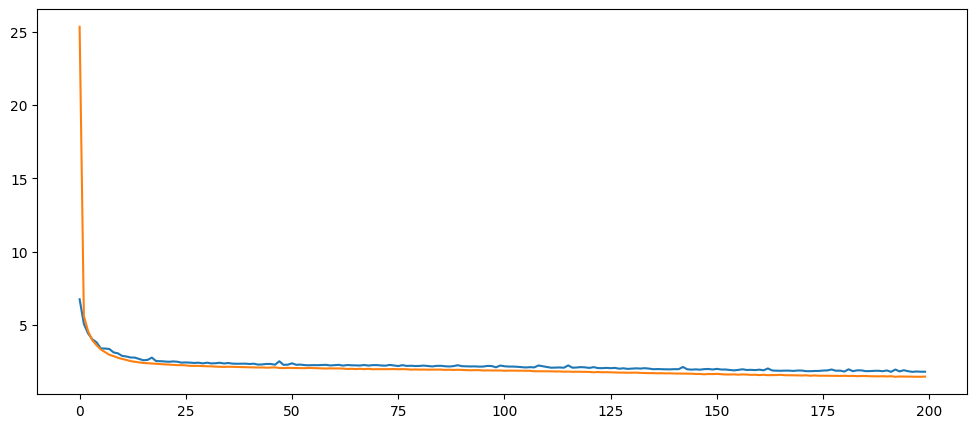

In [ ]:
fig,ax=plt.subplots(figsize=(12,5))
ax.plot(history.history["val_mean_absolute_error"],label="val_mean_absolute_error")
ax.plot(history.history["mean_absolute_error"],label="mean_absolute_error")

In [ ]:
prediction=model.predict(x_test_s)
r2 = r2_score(y_test, prediction)
print("R-squared:", r2)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
R-squared: 0.9342003416350624
